> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

# import

In [1]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
options(repr.plot.width = 15, repr.plot.height = 8)

# 1. $AR(p)$ process

`-` $Z_t = δ + ϕ_1Z_{t−1} + ⋯ + ϕ_pZ_{t−p} + ϵ_t, ϵ_t ∼ WN(0, σ^2)$

- $E(Z_t) = \mu | Z_t - \mu = ϕ_1(Z_{t-1} - \mu) + \dots + ϕ_p(Z_{t-p} - \mu) + \epsilon$

- $\delta = (1 - ϕ_1 - \dots - ϕ_p) \mu$

`-` $AR(p)$ 과정을 따르는 데이터 생성하기


- 초기값으로 $Z_1$ 과 같은 값들이 필요함

In [3]:
sim_ar <- function(n, mu, phi){
 ### n : sample size
 ### mu : mean
 ### phi : p-dim coefficients

 p <- length(phi)
 z <- rnorm(n+100) #epsilon ~ WN(0, sigma^2), iid N(0,1)
 delta <- (1-sum(phi))*mu

 for (k in (length(phi)+1):(n+100)){

 z[k] <- delta + sum(z[(k-1):(k-p)]*phi) + rnorm(1) 
 }

 return(z[-(1:100)])
}


`-` $AR(1) : Z_t = 0.5Z_{t−1} + ϵ_t$

In [4]:
z <- sim_ar(100, 0, phi=c(0.5)) ##AR(1)

- $ar(n, \mu, ϕ_1)$

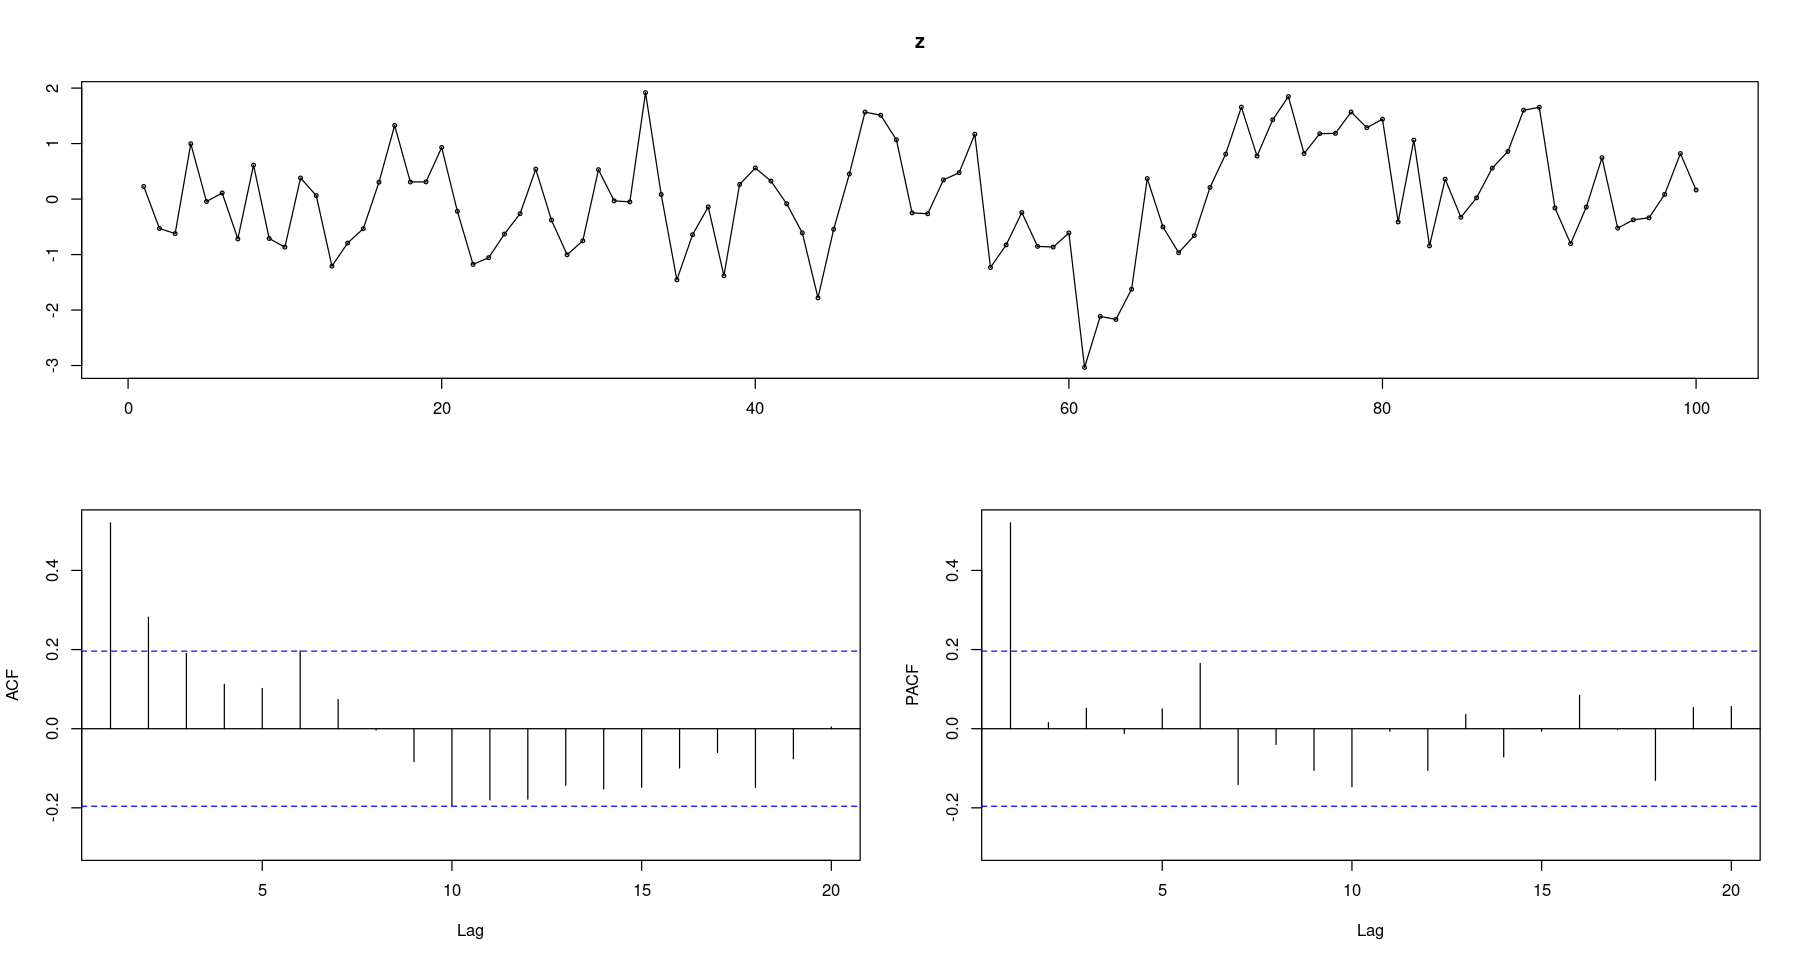

In [13]:
forecast::tsdisplay(z)

`-` arima.sim 함수 사용

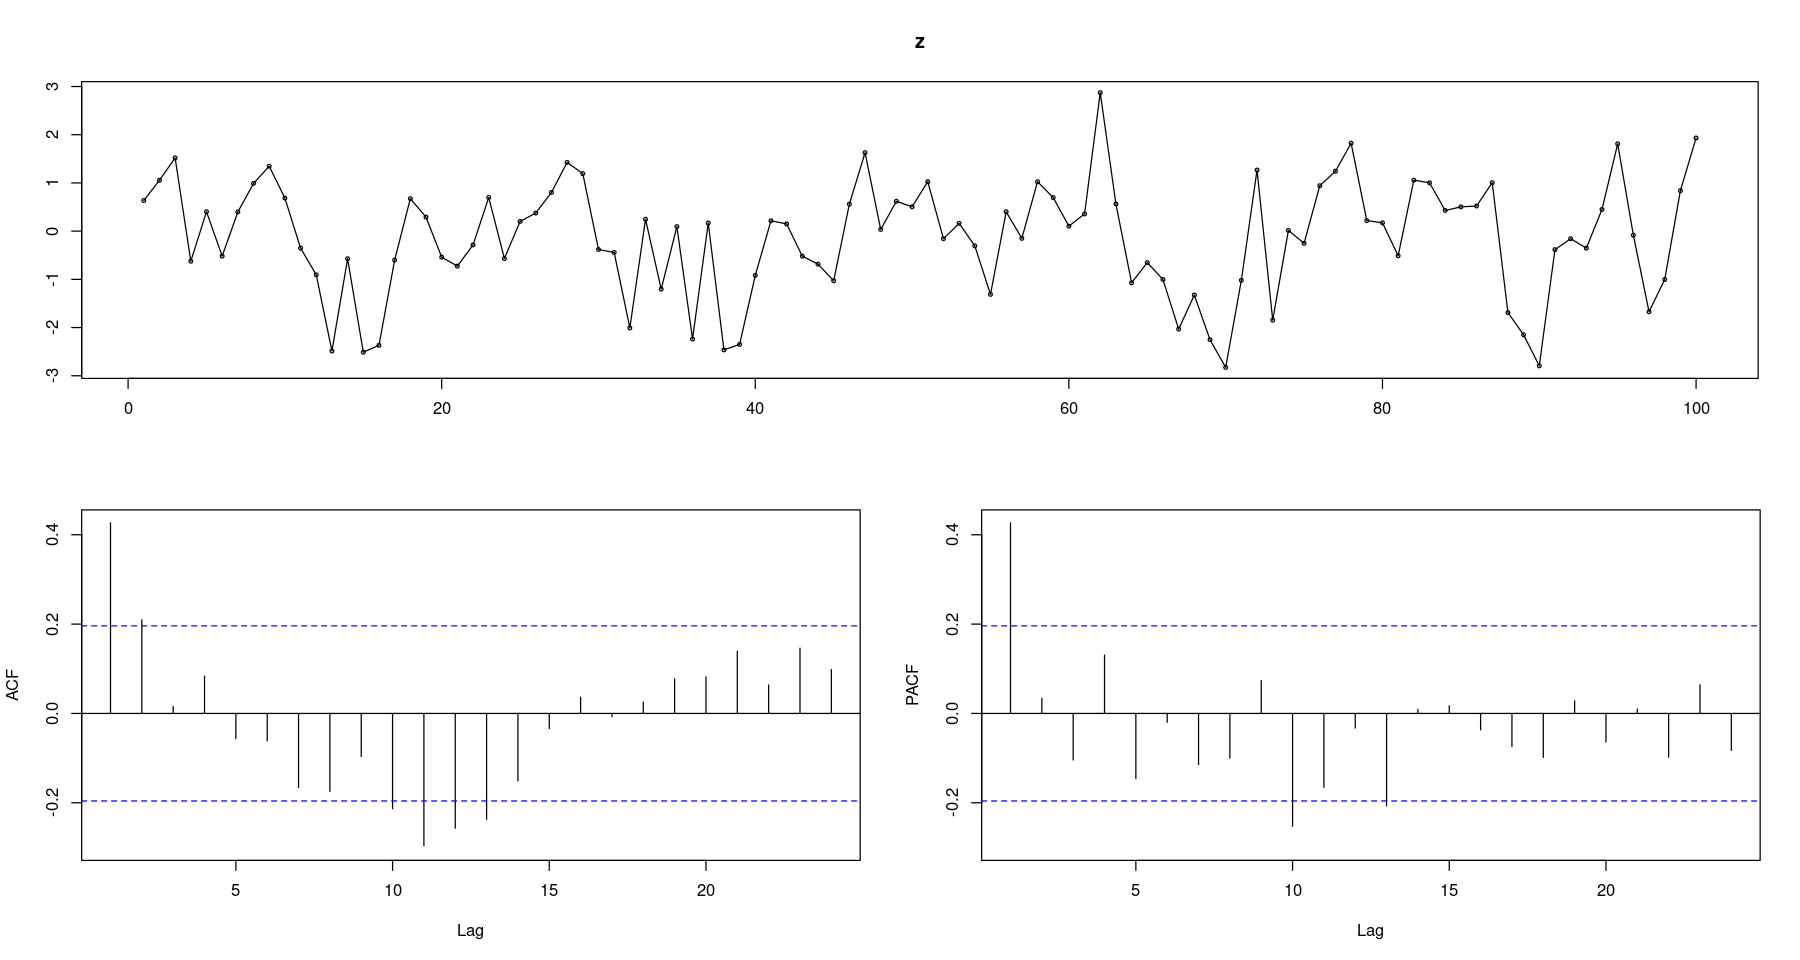

In [19]:
##AR(1) phi=0.5
z <- arima.sim(n=100, ##order=c(p,d,q) ARMA : d=0, AR : d=q=0
 list(order=c(1,0,0), ar= 0.5), #ar=ϕ1
 rand.gen = rnorm,
 sd = sqrt(1)) #분산
forecast::tsdisplay(z, lag.max=24)

In [15]:
z <- arima.sim(n=10000, ##order=c(p,d,q) ARMA : d=0, AR : q=0
 list(ar= 0.5)
 )

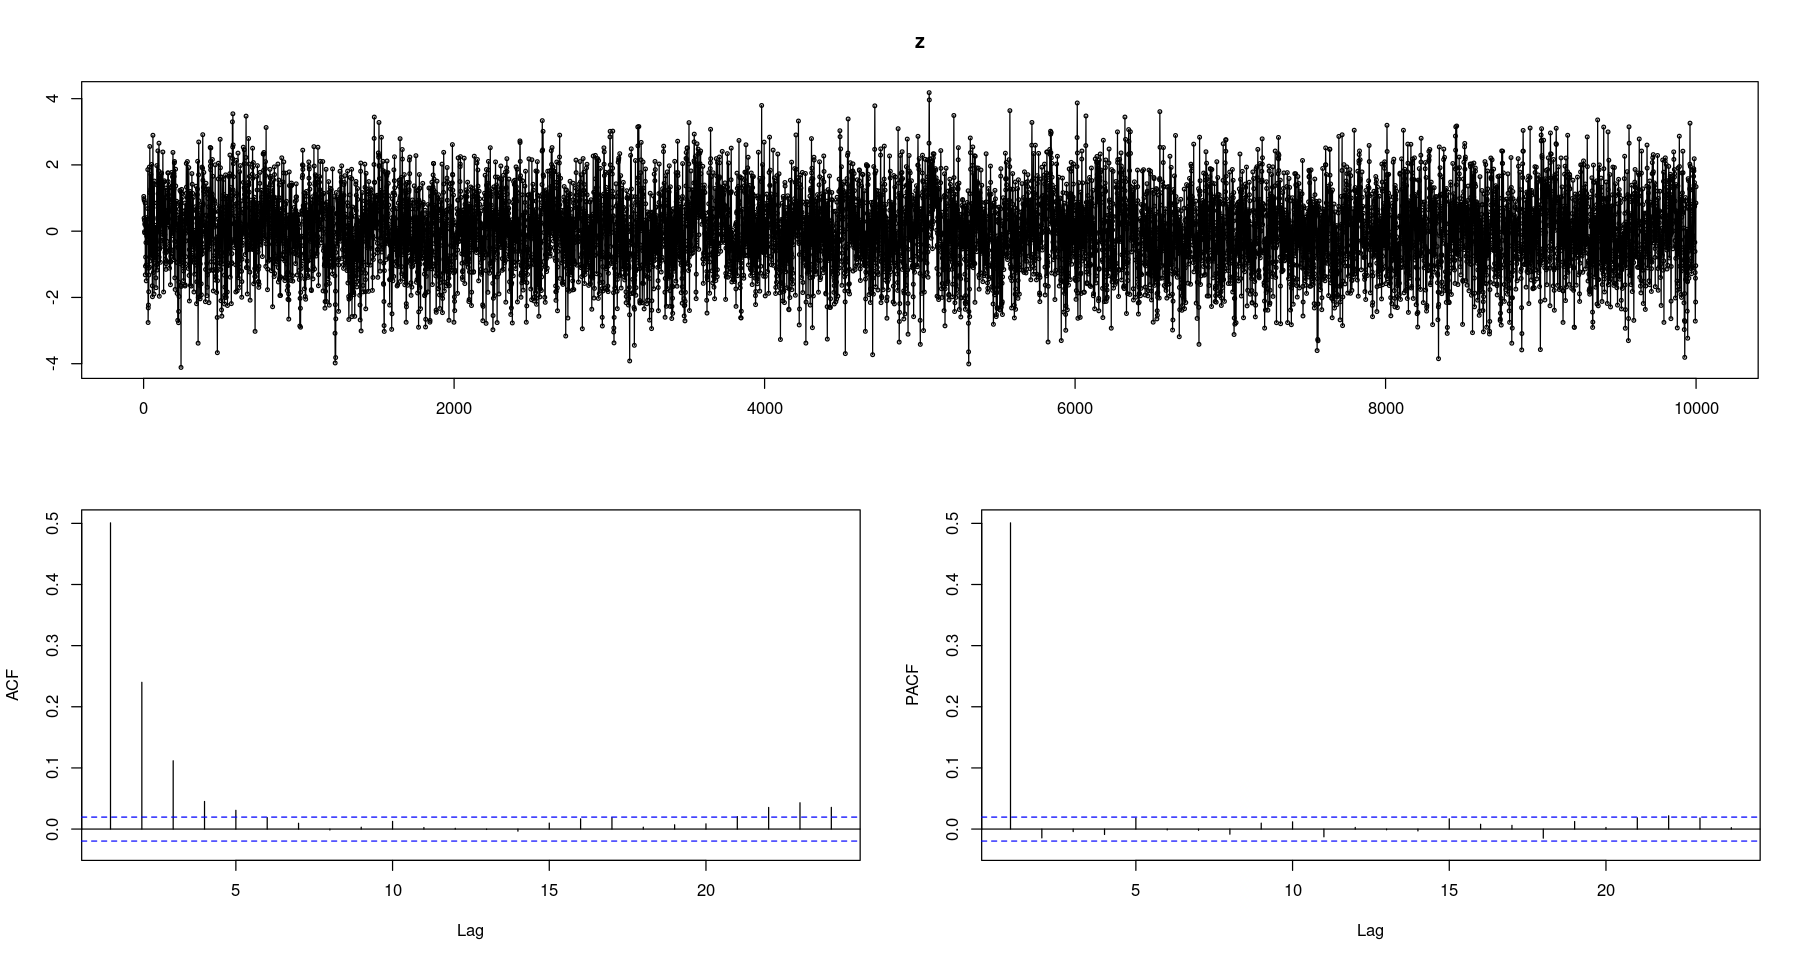

In [16]:
forecast::tsdisplay(z, lag.max=24)

`-` $AR(2) : Z_t = 0.5Z_{t−1} − 0.4Z_{t−2} + ϵ_t$

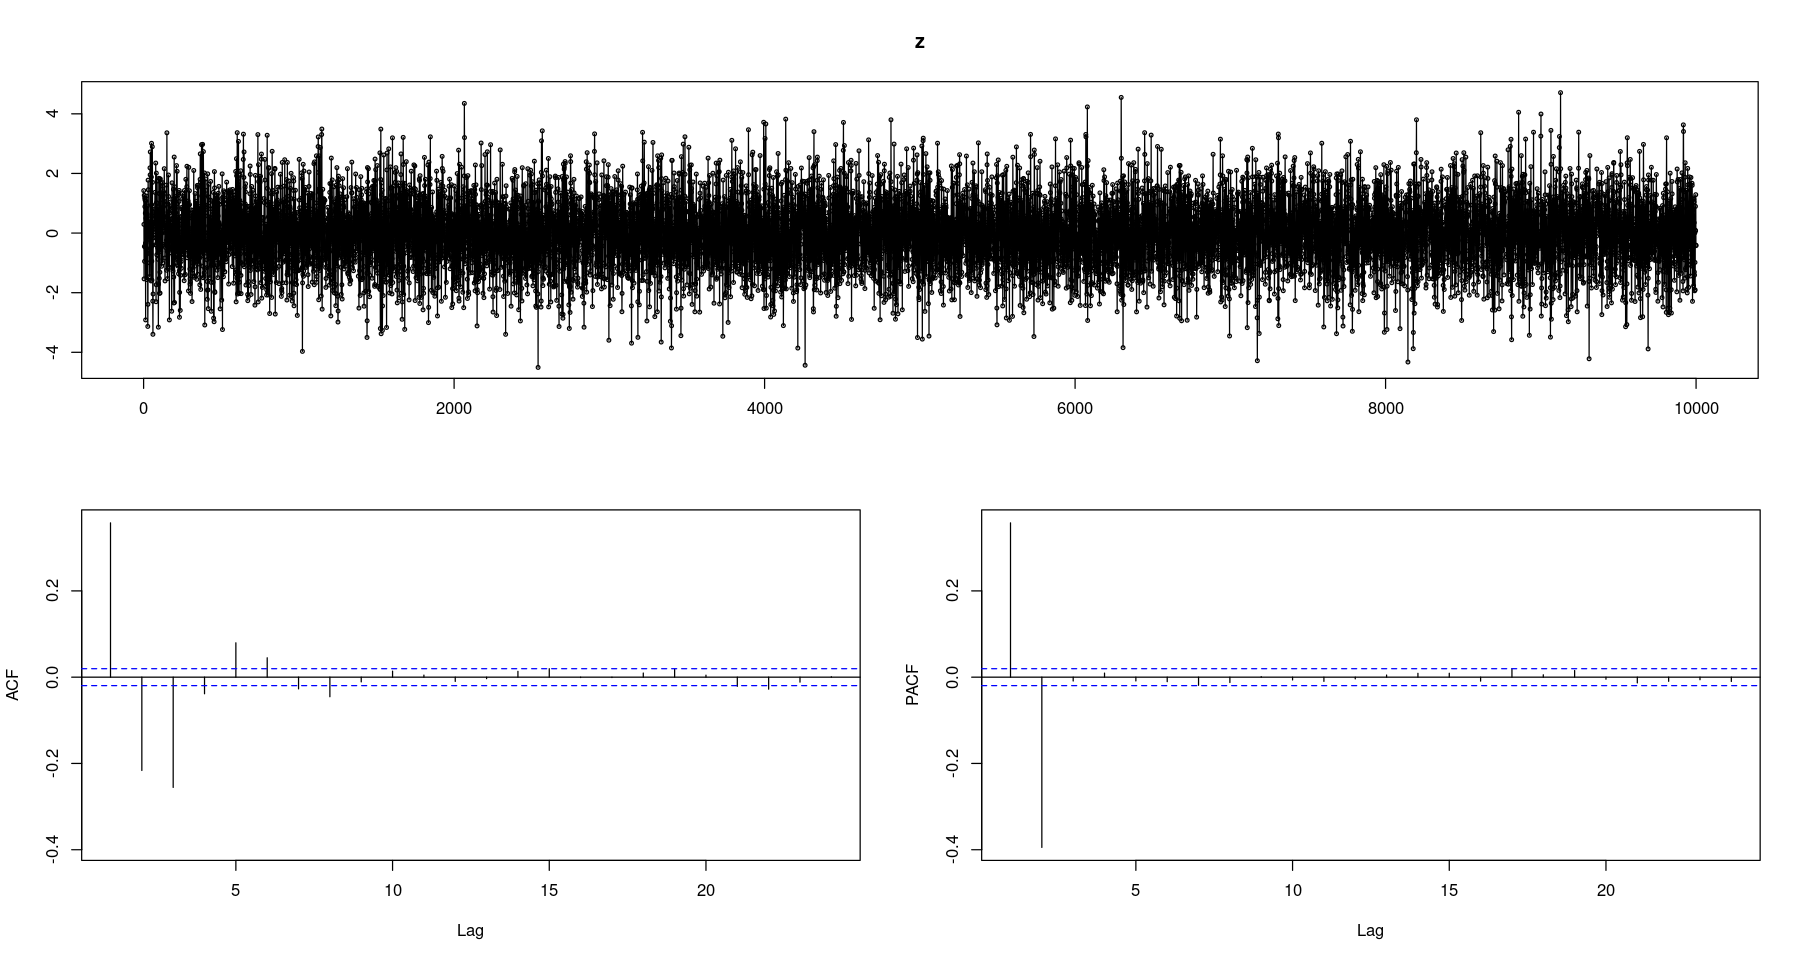

In [17]:
z <- arima.sim(n=10000, list(order=c(2,0,0),
 ar=c(0.5, -0.4)), rand.gen = rnorm)
forecast::tsdisplay(z, lag.max=24)

# 2. $MA(q)$ process

`-` $Z_t − μ = ε_t − θ_1ε_{t−1} − ⋯ − θ_qε_{t−q}, ε_t ∼ WN(0, σ^2)$


In [20]:
sim_ma <- function(n, mu, theta){
 ### n : sample size
 ### mu : mean
 ### theta : q-dim coefficients

 q <- length(theta)

 ep <- rnorm(n+100)
    
 z <- ep

 for (k in (q+1):(n+100)){

 z[k] <- mu + ep[k] - sum(ep[(k-1):(k-q)]*theta)
 }

 return(z[-(1:100)])
}


`-` $Z_t = ε_t − 0.9ε_{t−1}$


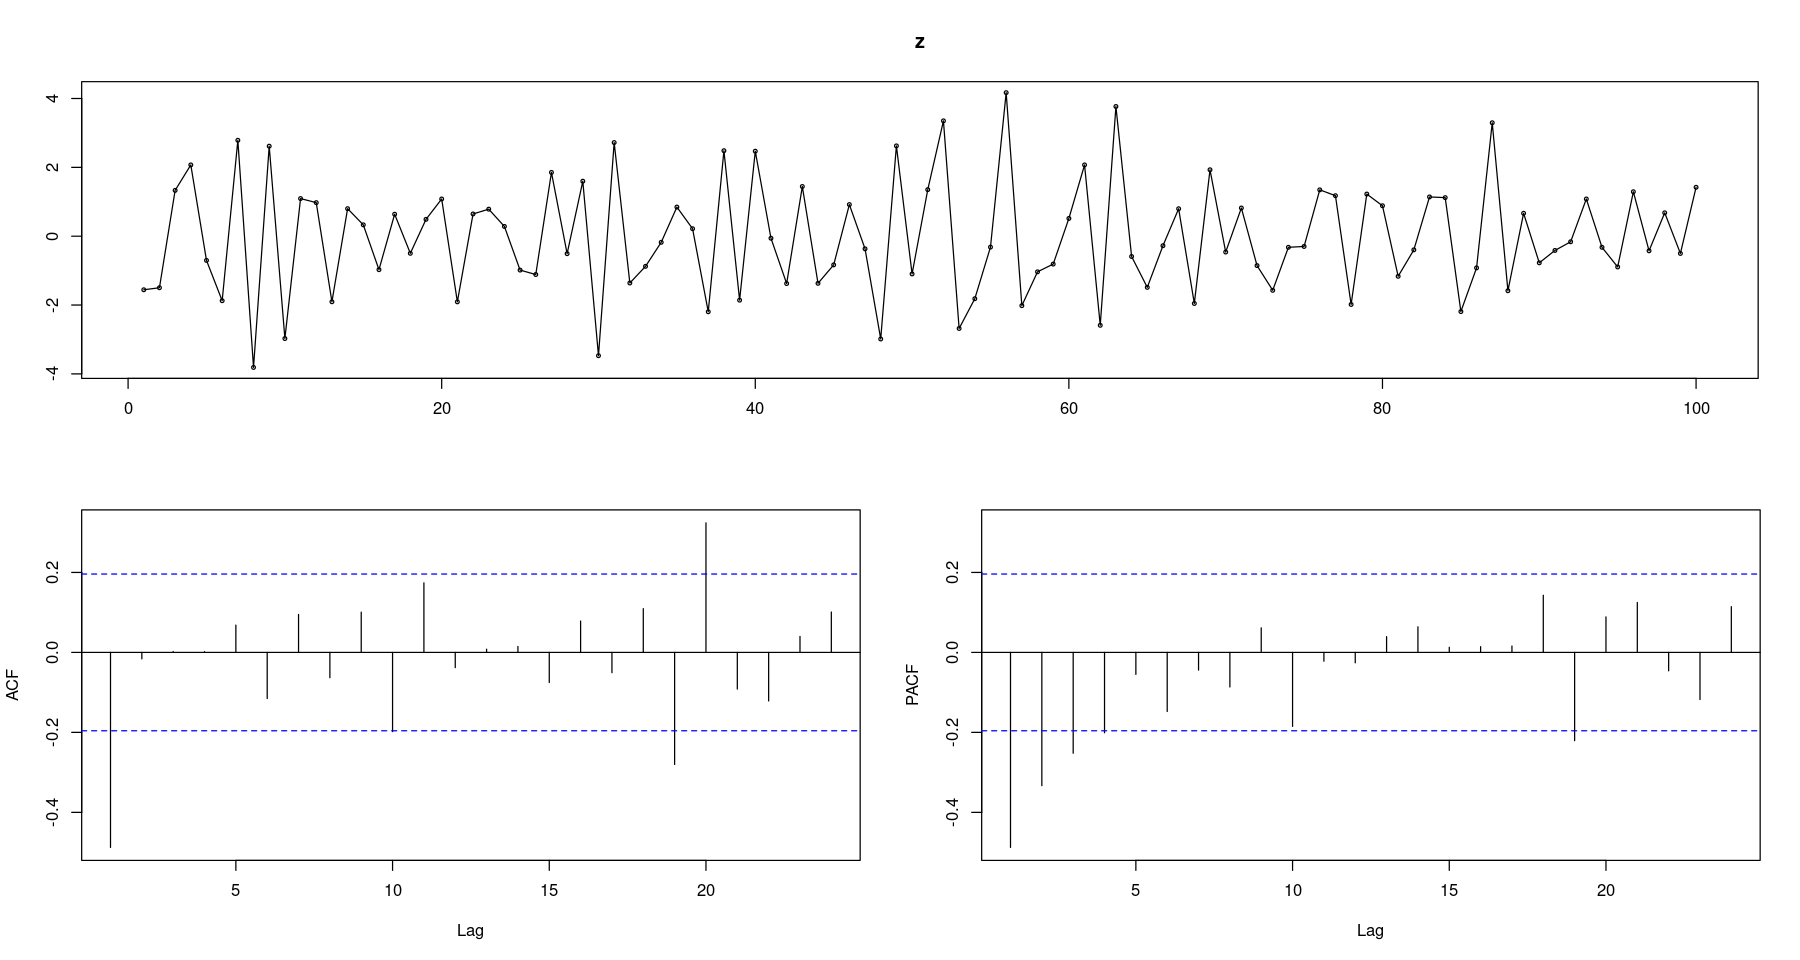

In [21]:
z <- sim_ma(100, 0, theta=0.9)
forecast::tsdisplay(z, lag.max=24)

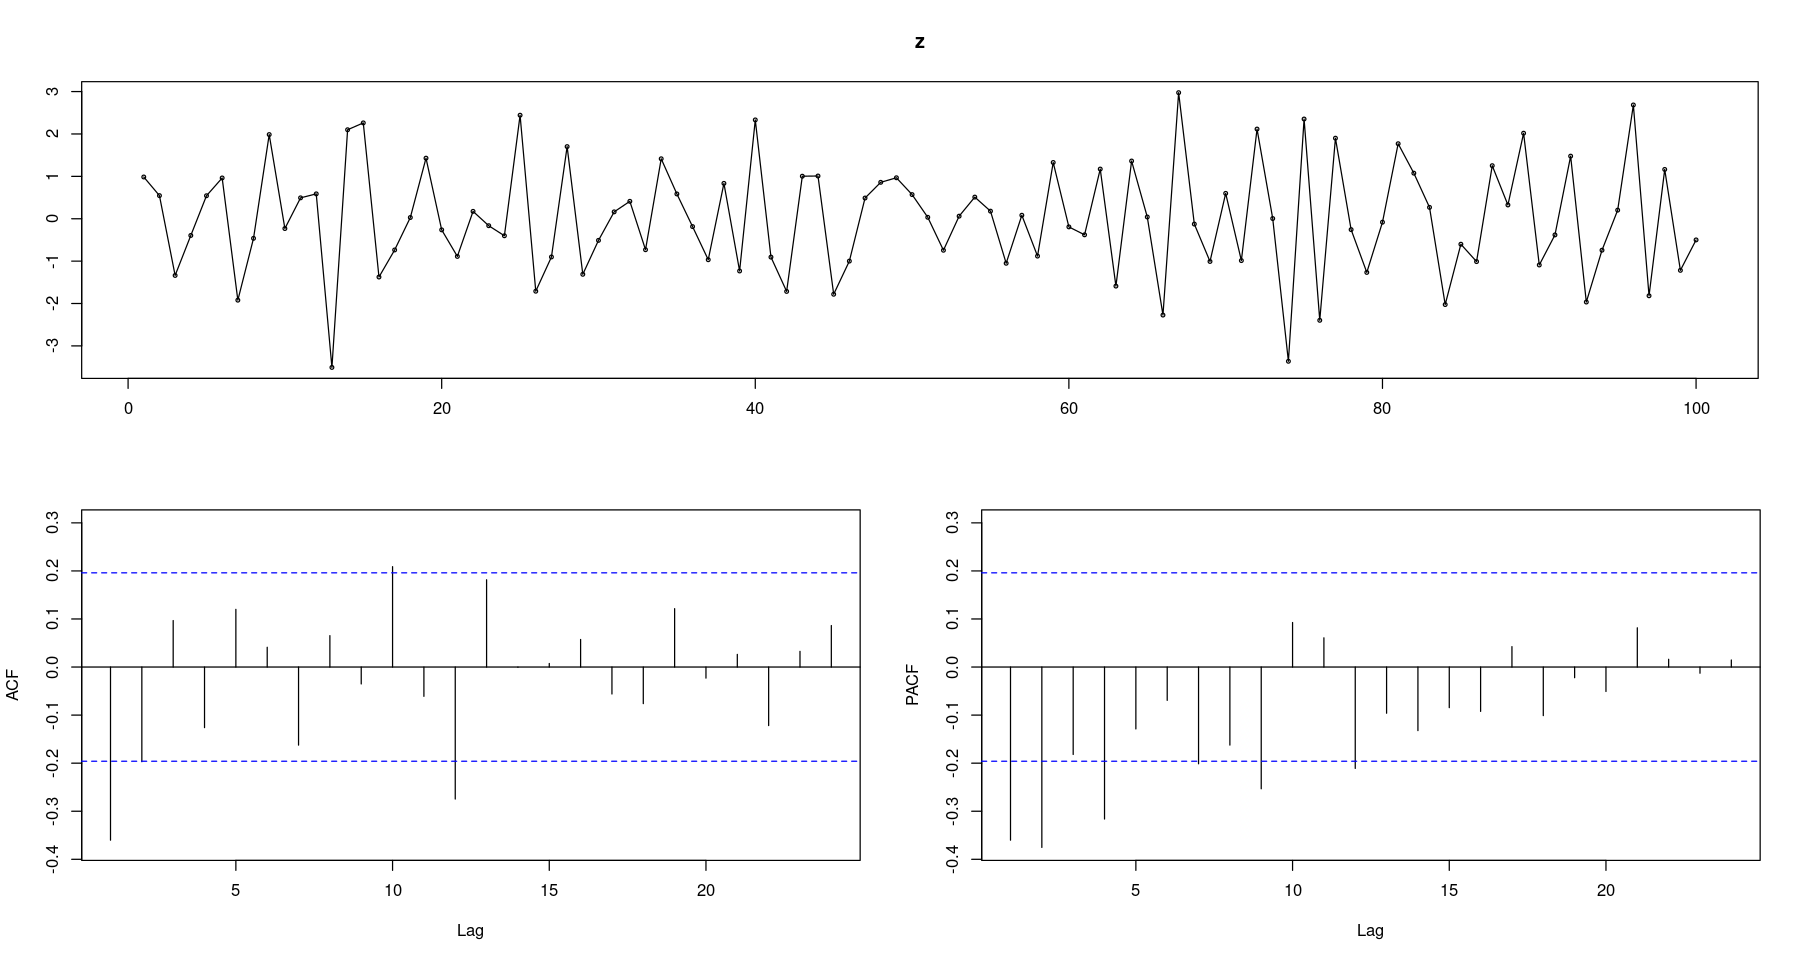

In [22]:
z <- arima.sim(n=100, #ARMA : d=0, MA : p=d=0
 list(order=c(0,0,1), ma= -0.9),
 rand.gen = rnorm)
# z <- arima.sim(n=100, list(ma= 0.9), rand.gen = rnorm)
forecast::tsdisplay(z, lag.max=24)

- 강의록에 있는 $\theta$와 양/음 부호가 다르다.

`-` $Z_t = ε_t − 0.5ε_{t−1} + 0.2ε_{t−2}$

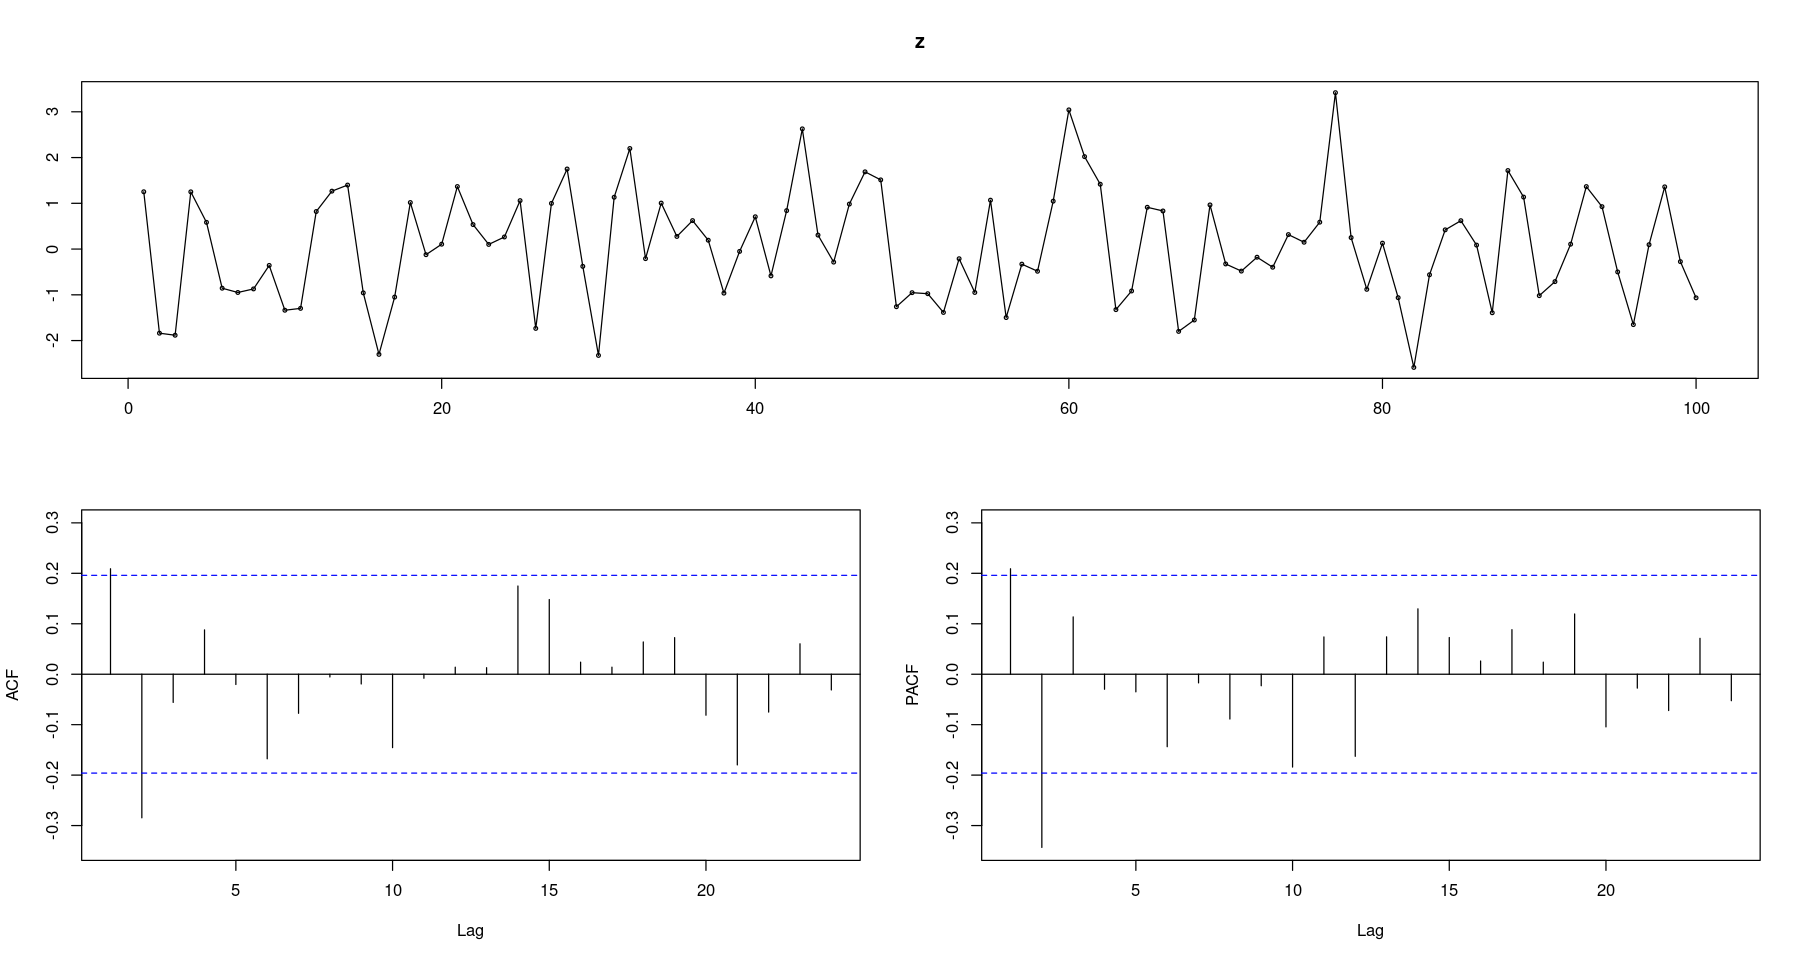

In [23]:
z <- arima.sim(n=100,
 list(order=c(0,0,2), ma=c(0.5, -0.2)))
forecast::tsdisplay(z, lag.max=24)

# $3.ARMA(p,q)$ preocess

`-` $Z_t = δ + ϕ_1Z_{t−1} + ⋯ + ϕ_pZ_{t−p} + ε_t − θ_1ε_{t−1} − ⋯θ_qε_{t−q}, ε_t ∼ WN(0, σ^2)$

`-` $ARMA(1,1): Z_t = -0.5Z_{t-1} + \epsilon_t - 0.3 \epsilon_{t-1}, \epsilon_t \sim WN(0,1)$

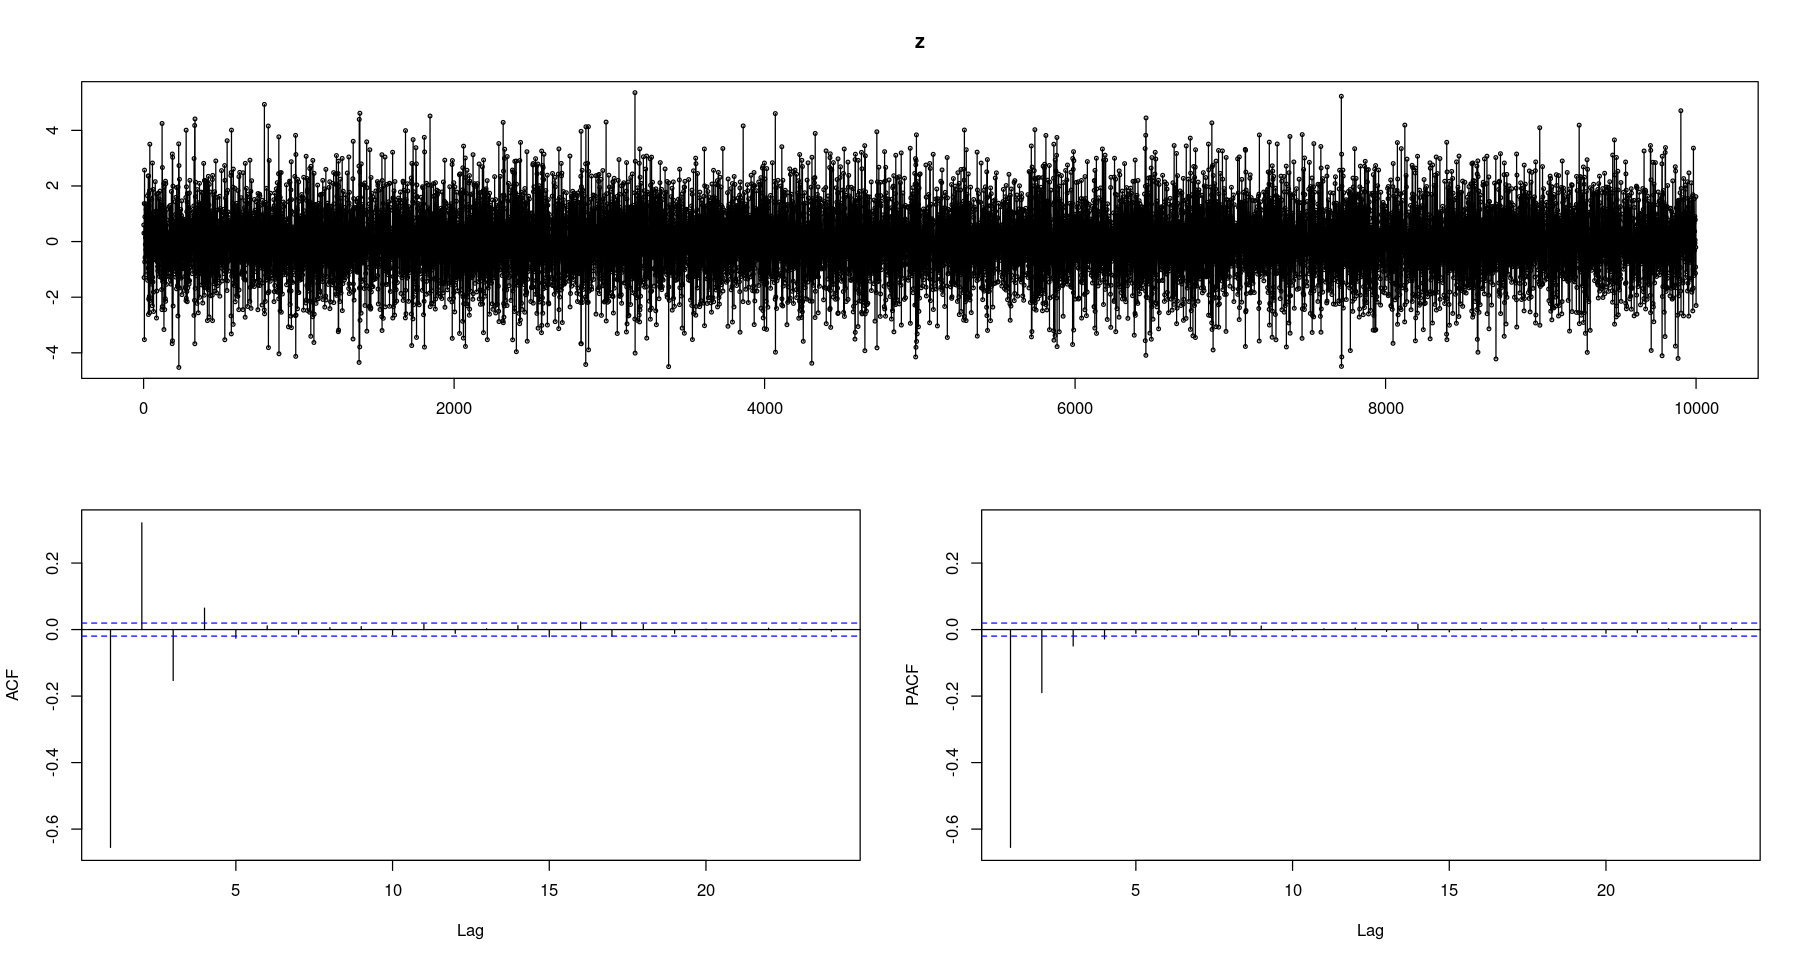

In [24]:
z <- arima.sim(n=10000,
 list(order=c(1,0,1), ar=-0.5, ma=-0.3),
 rand.gen = rnorm)
forecast::tsdisplay(z, lag.max=24)
